In [1]:
import pandas as pd
import numpy as np

***Data Description***

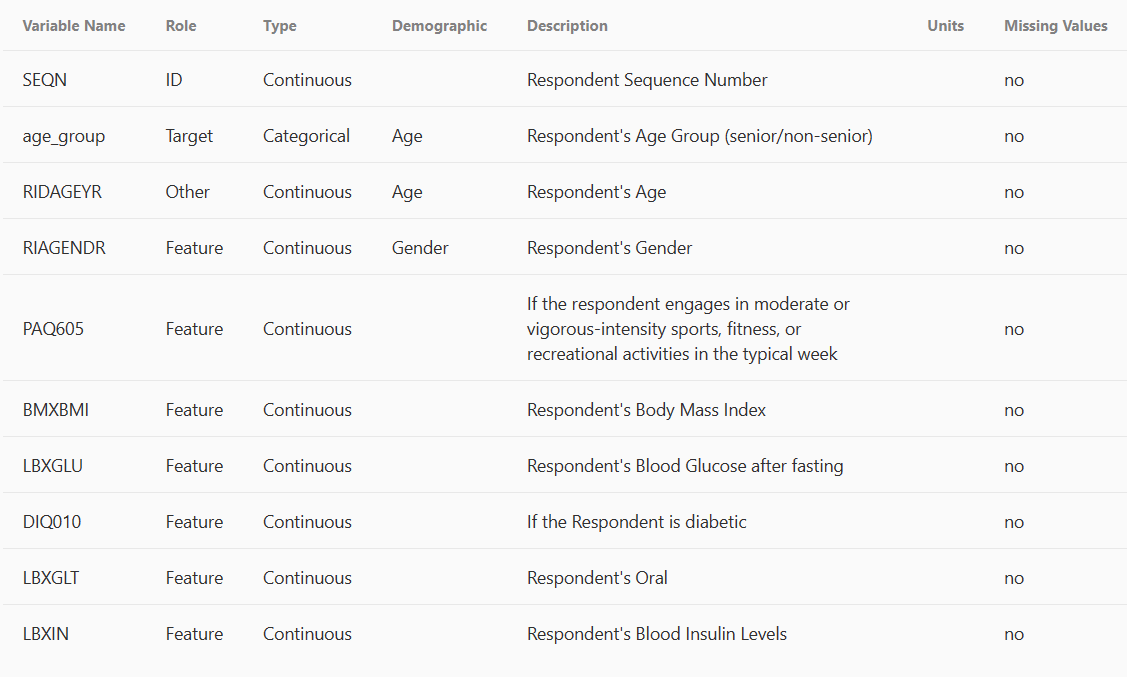

### import data set

In [2]:
nhanes_df = pd.read_csv("NHANES_age_prediction.csv")
nhanes_df.head(-5)

SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0     73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1     73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2     73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3     73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4     73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   
...       ...       ...       ...       ...     ...     ...     ...     ...   
2268  83692.0    Senior      68.0       1.0     2.0    19.1    89.0     2.0   
2269  83694.0     Adult      36.0       2.0     2.0    25.3    99.0     2.0   
2270  83699.0     Adult      37.0       2.0     2.0    20.8    83.0     2.0   
2271  83702.0    Senior      80.0       2.0     2.0    27.9   111.0     2.0   
2272  83707.0     Adult      18.0       1.0     2.0    22.5    98.0     2.0   

      LBXGLT  LBXIN  
0      150.0  14.91  
1       80.0   3.85  
2       68.0   6.14  
3       84.0  16.15  
4       81.0  10.92  
...      ...    ...  
2268   136.0   1.56  
2269   128.0  20.72  
2270   113.0   1.93  
2271    72.0  13.91  
2272    79.0   3.51  

[2273 rows x 10 columns]

In [3]:
nhanes_df.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

### Characterisation of the data set

In [4]:
# Display basic information about the dataset
print("Dataset Size:", nhanes_df.shape)
print("Number of Attributes:", len(nhanes_df.columns))
print("Number of Observations:", len(nhanes_df))

# Check for missing values
missing_values = nhanes_df.isnull().sum()
if missing_values.any():
    print("Missing Values:\n", missing_values)
else:
    print("No Missing Values")

# Display additional information about the dataset
print("\nAdditional Information:")
print(nhanes_df.info())

Dataset Size: (2278, 10)
Number of Attributes: 10
Number of Observations: 2278
No Missing Values

Additional Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB
None


### Data Preparation and EDA

In [5]:
len(nhanes_df["SEQN"].unique())

2278

In [6]:
# We are deleting the SEQN column because it is an id and because the id is a unique value, we will not be able to use this information, so we are deleting it
nhanes_df = nhanes_df.drop("SEQN", axis=1)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 

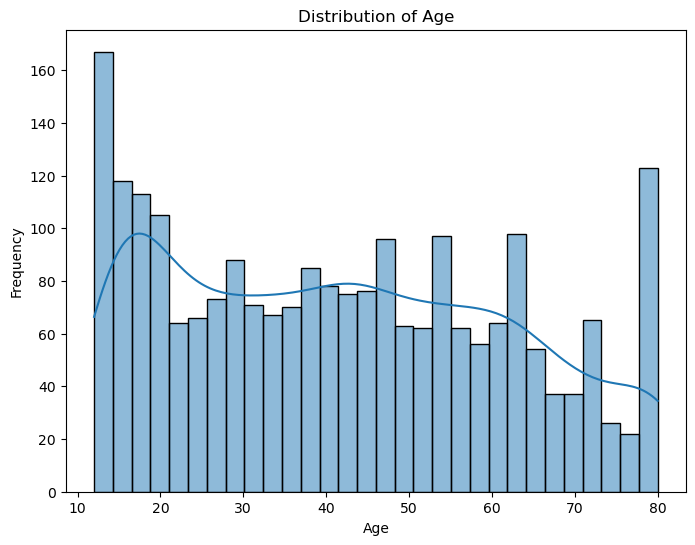

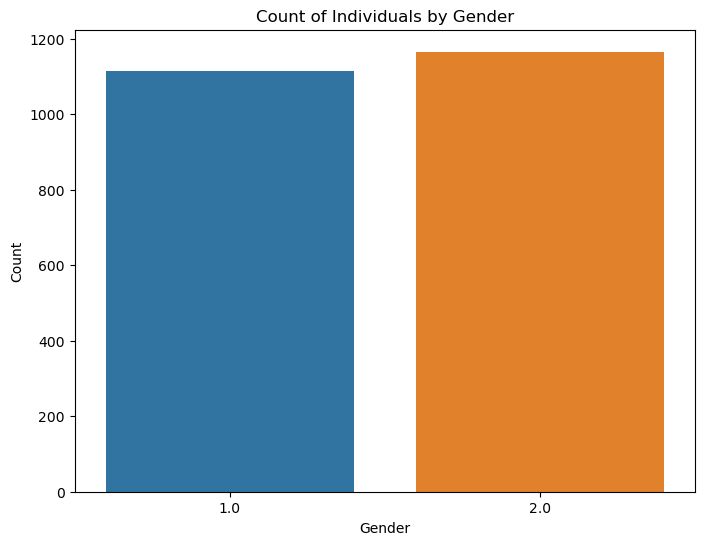

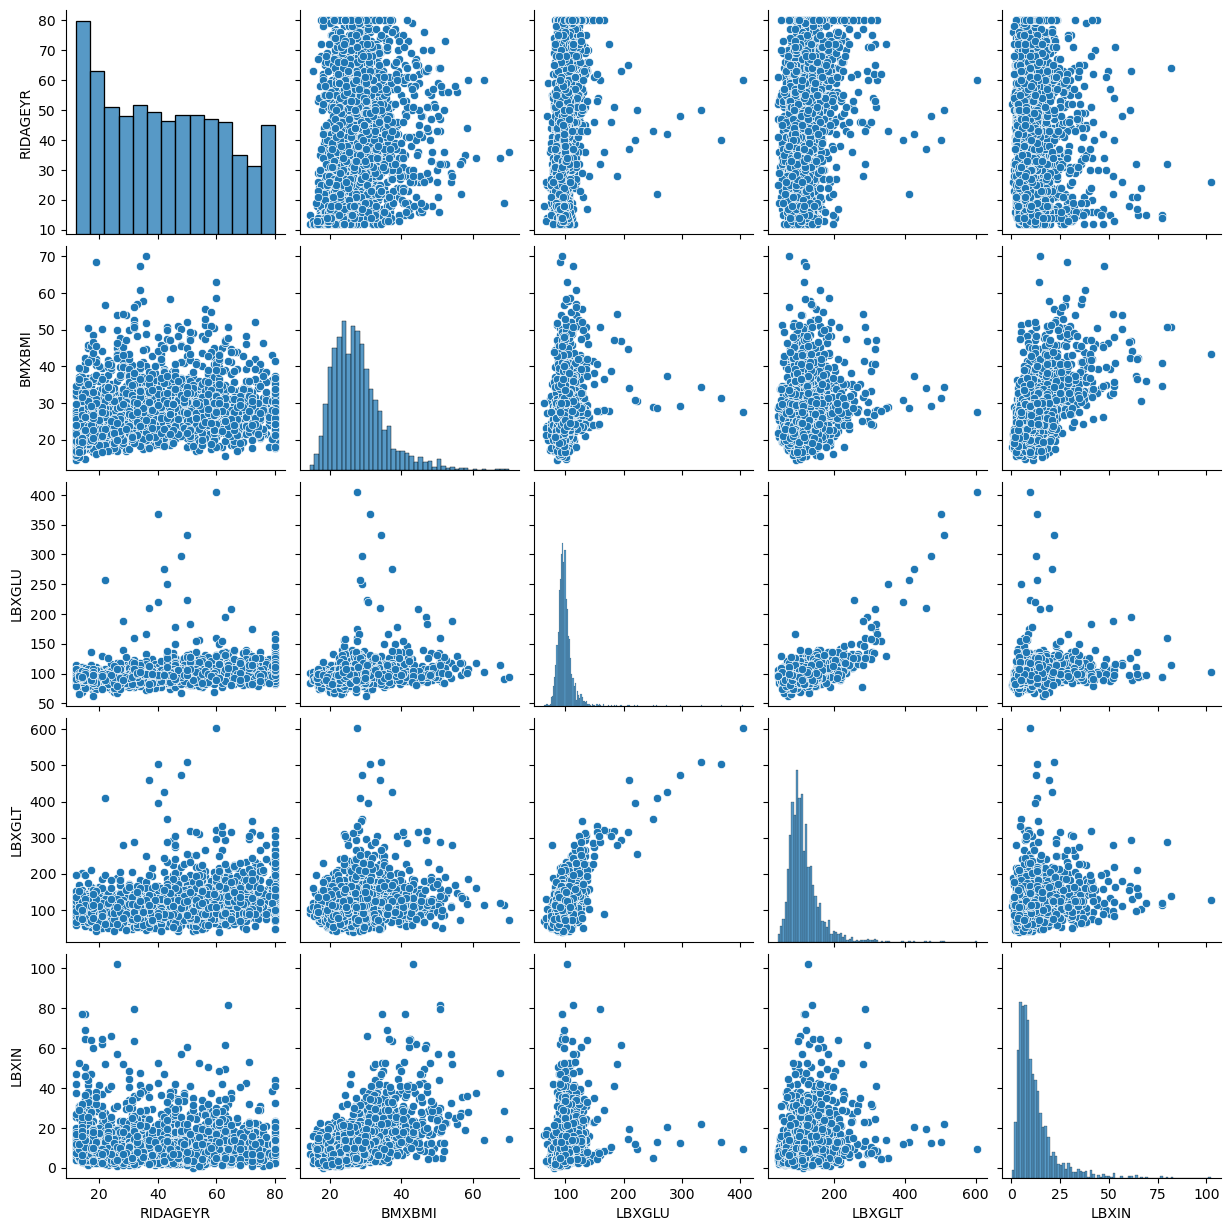

In [8]:
# EDA Visualizations
# Example 1: Histogram of a numerical variable
plt.figure(figsize=(8, 6))
sns.histplot(nhanes_df['RIDAGEYR'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Example 2: Count plot of a categorical variable
plt.figure(figsize=(8, 6))
sns.countplot(x='RIAGENDR', data=nhanes_df)
plt.title('Count of Individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Example 3: Pairplot for numerical variables
numerical_columns = ['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

sns.pairplot(nhanes_df[numerical_columns])
plt.show()

## Encoding, Scaling, and Feature Engineering

### Using Label Encoding

Only one of our columns has categorical data ( age_group), so we are doing this encoding application

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()

nhanes_df['age_group_encoded'] = label_encoder.fit_transform(nhanes_df['age_group'])

In [11]:
nhanes_df.head(-5)

age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  \
0        Adult      61.0       2.0     2.0    35.7   110.0     2.0   150.0   
1        Adult      26.0       2.0     2.0    20.3    89.0     2.0    80.0   
2        Adult      16.0       1.0     2.0    23.2    89.0     2.0    68.0   
3        Adult      32.0       1.0     2.0    28.9   104.0     2.0    84.0   
4        Adult      38.0       2.0     1.0    35.9   103.0     2.0    81.0   
...        ...       ...       ...     ...     ...     ...     ...     ...   
2268    Senior      68.0       1.0     2.0    19.1    89.0     2.0   136.0   
2269     Adult      36.0       2.0     2.0    25.3    99.0     2.0   128.0   
2270     Adult      37.0       2.0     2.0    20.8    83.0     2.0   113.0   
2271    Senior      80.0       2.0     2.0    27.9   111.0     2.0    72.0   
2272     Adult      18.0       1.0     2.0    22.5    98.0     2.0    79.0   

      LBXIN  age_group_encoded  
0     14.91                  0  
1      3.85                  0  
2      6.14                  0  
3     16.15                  0  
4     10.92                  0  
...     ...                ...  
2268   1.56                  1  
2269  20.72                  0  
2270   1.93                  0  
2271  13.91                  1  
2272   3.51                  0  

[2273 rows x 10 columns]

### Scaling

let's check the data distribution

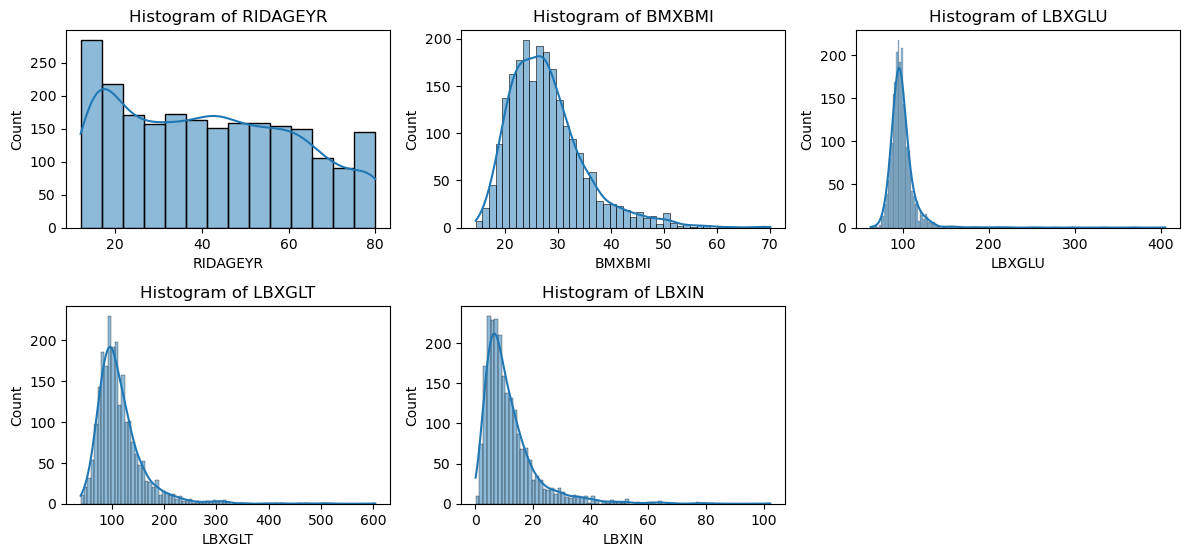

In [12]:
selected_columns = ['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
subset_df = nhanes_df[selected_columns]

# Drawing a histogram
plt.figure(figsize=(12, 8))
for i, column in enumerate(selected_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=subset_df, x=column, kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

As can be seen above, the data distribution is normal, so we can use a standard scaller.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

# Selection of features that you want to standardize
X = nhanes_df[['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']]

# Standardize the data and assign it to a new DATAFRAME
X_standardized = scaler.fit_transform(X)

# Creating a new dataframe
nhanes_scaled = pd.DataFrame(X_standardized, columns=X.columns)


In [15]:
nhanes_scaled.head()

RIDAGEYR  RIAGENDR    PAQ605    BMXBMI    LBXGLU    DIQ010    LBXGLT  \
0  0.952979  0.977428  0.444672  1.068639  0.584085 -0.087553  0.744323   
1 -0.783849  0.977428  0.444672 -1.056270 -0.590024 -0.087553 -0.743427   
2 -1.280085 -1.023094  0.444672 -0.656125 -0.590024 -0.087553 -0.998470   
3 -0.486107 -1.023094  0.444672  0.130367  0.248625 -0.087553 -0.658413   
4 -0.188365  0.977428 -2.062661  1.096235  0.192715 -0.087553 -0.722174   

      LBXIN  
0  0.316487  
1 -0.821762  
2 -0.586084  
3  0.444103  
4 -0.094147

In [16]:
nhanes_scaled = pd.concat([nhanes_scaled, nhanes_df['age_group_encoded']], axis=1)

In [17]:
nhanes_scaled.head(-5)

RIDAGEYR  RIAGENDR    PAQ605    BMXBMI    LBXGLU    DIQ010    LBXGLT  \
0     0.952979  0.977428  0.444672  1.068639  0.584085 -0.087553  0.744323   
1    -0.783849  0.977428  0.444672 -1.056270 -0.590024 -0.087553 -0.743427   
2    -1.280085 -1.023094  0.444672 -0.656125 -0.590024 -0.087553 -0.998470   
3    -0.486107 -1.023094  0.444672  0.130367  0.248625 -0.087553 -0.658413   
4    -0.188365  0.977428 -2.062661  1.096235  0.192715 -0.087553 -0.722174   
...        ...       ...       ...       ...       ...       ...       ...   
2268  1.300344 -1.023094  0.444672 -1.221847 -0.590024 -0.087553  0.446773   
2269 -0.287612  0.977428  0.444672 -0.366365 -0.030925 -0.087553  0.276744   
2270 -0.237989  0.977428  0.444672 -0.987279 -0.925484 -0.087553 -0.042059   
2271  1.895828  0.977428  0.444672 -0.007614  0.639995 -0.087553 -0.913456   
2272 -1.180838 -1.023094  0.444672 -0.752712 -0.086835 -0.087553 -0.764681   

         LBXIN  age_group_encoded  
0     0.316487                  0  
1    -0.821762                  0  
2    -0.586084                  0  
3     0.444103                  0  
4    -0.094147                  0  
...        ...                ...  
2268 -1.057439                  1  
2269  0.914428                  0  
2270 -1.019360                  0  
2271  0.213572                  1  
2272 -0.856753                  0  

[2273 rows x 9 columns]

## comparison of PCA and LDA

In [18]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [19]:
# PCA
# In this case, we apply it to PCA by removing the target variable because PCA focuses on maximizing the variance of the dataset and does not need target information.
X_scaled_pca = nhanes_scaled.drop('age_group_encoded', axis=1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_pca)

In [20]:
# LDA
lda = LinearDiscriminantAnalysis()

X_lda = nhanes_scaled.drop('age_group_encoded', axis=1)
y_lda = nhanes_scaled['age_group_encoded']

X_lda_transformed  = lda.fit_transform(X_lda, y_lda)

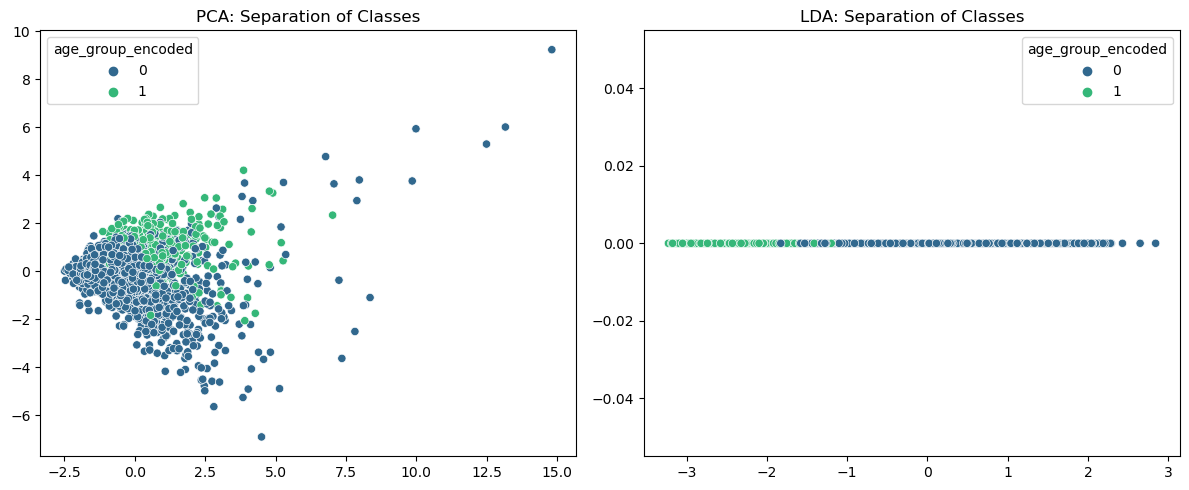

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# PCA Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_lda, palette='viridis')
plt.title('PCA: Separation of Classes')

# LDA Visualization
plt.subplot(1, 2, 2)

# If the LDA result is one-dimensional, only [:, 0] should be used
if X_lda_transformed.shape[1] == 1:
    sns.scatterplot(x=X_lda_transformed[:, 0], y=[0] * len(X_lda_transformed), hue=y_lda, palette='viridis')
else:
    sns.scatterplot(x=X_lda_transformed[:, 0], y=X_lda_transformed[:, 1], hue=y_lda, palette='viridis')

plt.title('LDA: Separation of Classes')

plt.tight_layout()
plt.show()

If you want to Decipher the main differences between Linear Discriminatory Analysis (LDA) and Principal Component Analysis (PCA) in your own words and discuss the effects of your results on the classification of normal and abnormal proposals or clustering analysis, you can focus on the following elements::

Purpose:

PCA: Focuses on finding the largest variance between variables in the data set and reflecting this variance on a small number of new features.Deca: PCA focuses on finding the largest variance between variables in the data set and reflecting this variance on a small number of new features.
LDA: Focuses on maximizing Decoupling between classes. This aims to keep the classes as far away from each other as possible.
Data Transformation:

PCA: Does not take into account class information, it only Decries covariance between variables.
LDA: Using class information, it highlights the differences between classes and provides more Decoup Decoupling between classes.
Dimension:

PCA: Can be used to maintain the variance of the entire dataset, so it can remain in the original dataset size.
LDA: Usually produces as many discriminant functions as the number of classes, and this is ned

## Machine Learning Approaches

Supervised learning : It is a machine learning technique that produces a function from training data. In other words, this learning technique produces a function that maps between inputs (labeled data) and desired outputs. Training data consists of both inputs and outputs. The function can be determined by classification or regression algorithms.

Logical Justification for the Dataset: In the provided NHANES dataset, if you have labeled data indicating whether individuals are seniors or non-seniors, supervised learning can be employed. Potential tasks include predicting the age group (senior or non-senior) based on health-related features, which aligns with the labeled data available in the dataset. Supervised learning models, such as classification algorithms, can be trained on this labeled data to make predictions on new, unseen instances.

Supervised Learning Algorithms:

Classification:

Logistic Regression: Used for binary or multiclass classification.
Support Vector Machines (SVM): Separates the dataset into classes using hyperplanes.
Decision Trees: Makes decisions based on a tree-like model.
Random Forest: Ensemble method combining multiple decision trees.
k-Nearest Neighbors (k-NN): Classifies data based on its nearest neighbors.

Regression:

Linear Regression: Models a linear relationship to predict numerical output.
Ridge Regression: Improves linear regression, resistant to overfitting.
Lasso Regression: Improves linear regression, aids in feature selection.
Decision Trees for Regression: Predicts numerical output using tree structures.
Gradient Boosting Regressor: Combines weak predictors for regression.


Unsupervised learning : This method is a machine learning technique that uses a function to predict an unknown structure from unlabelled data. Here, it is unclear which class the input data belongs to.

Unsupervised Learning Algorithms:

Clustering:

K-Means: Groups data into a specified number of clusters (k).
Hierarchical Clustering: Divides data into clusters using a tree structure.
DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Density-based clustering algorithm.

Logical Justification for the Dataset: If the NHANES dataset lacks labeled information on whether an individual is a senior or non-senior, or if you want to explore inherent patterns in the data without a predefined target variable, unsupervised learning is relevant. Clustering algorithms can be used to identify natural groupings of individuals based on health features without prior knowledge of age groups. Dimensionality reduction techniques, like PCA or LDA, can be employed to visualize and analyze the structure of the data without relying on labeled information. 

Logical Decision:
If the goal is to predict age groups based on known labeled data, supervised learning (classification) would be the appropriate choice. If the goal is to explore inherent patterns, relationships, or groupings within the data without the need for labeled information, unsupervised learning techniques (clustering or dimensionality reduction) would be more suitable. Ultimately, the choice between supervised and unsupervised learning depends on the specific objectives of your analysis and the availability of labeled data in the NHANES dataset.

As we saw when we examined the NHANES dataset, we have target data. In this case, it would be more meaningful to use supervised learning techniques.


## Machine Learning Models / Hyperparameter Tuning

In [22]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [23]:
# Our fetures: X_lda_transformed and our target value is y_lda

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lda_transformed, y_lda, test_size=0.2, random_state=42)

# Random Forest for Classification
rf_classifier = RandomForestClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': range(2, 20, 5),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Accuracy: {accuracy}")



Best Accuracy: 0.9714912280701754


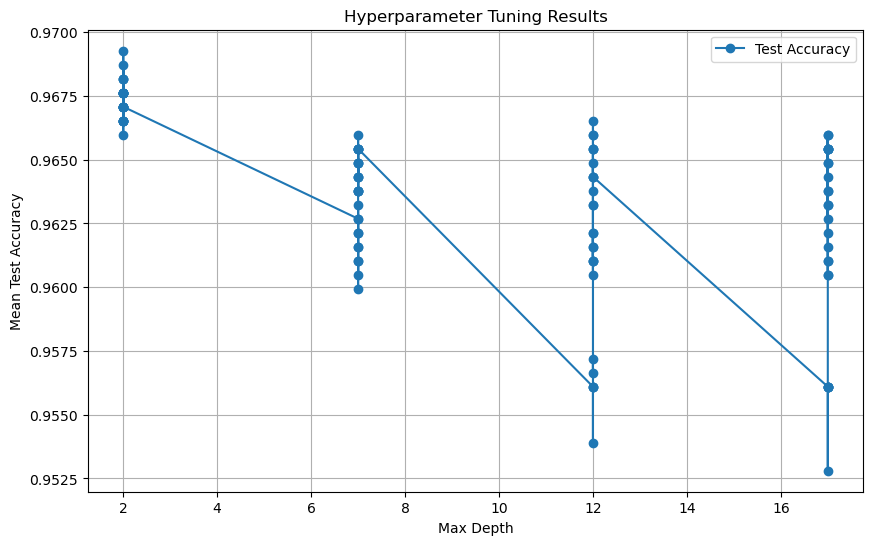

Best Accuracy: 0.96927291886196
Best Parameters: {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Getting the hyperparameter results
scores = grid_search.cv_results_

# Drawing test scores according to max depth
plt.figure(figsize=(10, 6))
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="Test Accuracy", 
         marker='o')

plt.xlabel("Max Depth")
plt.ylabel("Mean Test Accuracy")
plt.title("Hyperparameter Tuning Results")
plt.legend()
plt.grid(True)
plt.show()

# Creating a DataFrame showing GridSearchCV results
results_df = pd.DataFrame(scores)

# Printing the best parameters and score on the screen
print('Best Accuracy:', grid_search.best_score_)
print('Best Parameters:', grid_search.best_params_)


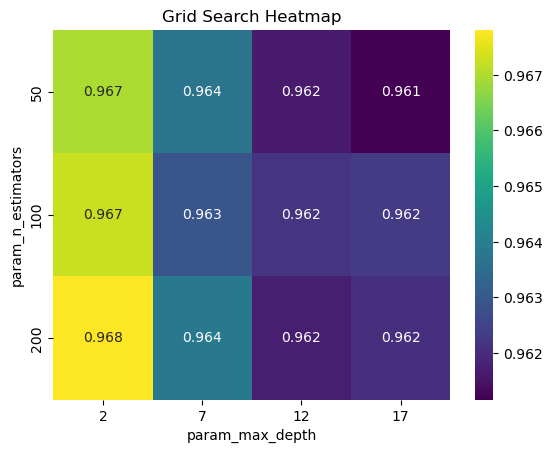

In [25]:
# Converting Grid Search results to DATAFRAME
results_df = pd.DataFrame(grid_search.cv_results_)

# Creating a heatmap
heatmap_data = results_df.pivot_table(index='param_n_estimators', columns='param_max_depth', values='mean_test_score', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Heatmap')
plt.show()


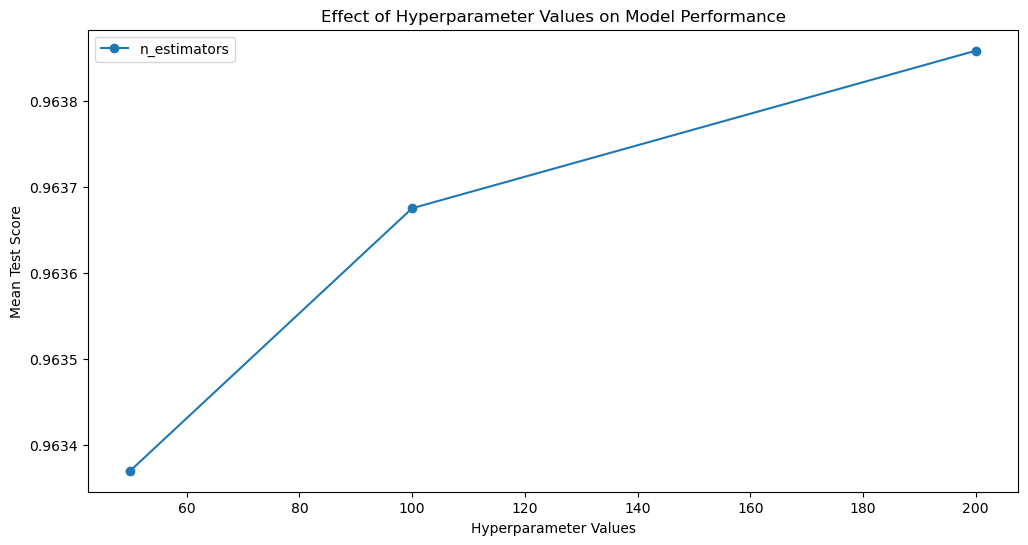

In [26]:
plt.figure(figsize=(12, 6))

# Just selecting the 'n_estimators' hyperparameter
param = 'n_estimators'
param_values = param_grid[param]

# Demonstration of the effect of hyperparameters on performance
plt.plot(param_values, results_df.groupby(f'param_{param}')['mean_test_score'].mean(), marker='o', label=param)

plt.xlabel('Hyperparameter Values')
plt.ylabel('Mean Test Score')
plt.title('Effect of Hyperparameter Values on Model Performance')
plt.legend()
plt.show()


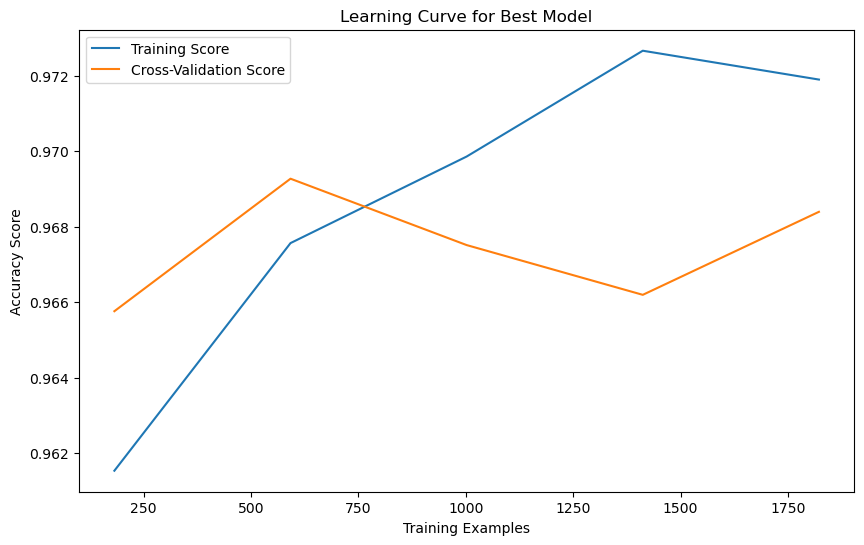

In [27]:
from sklearn.model_selection import learning_curve

# Creating a model with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params)

# Creating a learning curve
train_sizes, train_scores, test_scores = learning_curve(best_rf_classifier, X_lda_transformed, y_lda, cv=5, scoring='accuracy')

# Drawing by calculating averages
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for Best Model')
plt.legend()
plt.show()


### Clustering with KMeans

In [28]:
from sklearn.cluster import KMeans

C:\Users\sertacbattal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


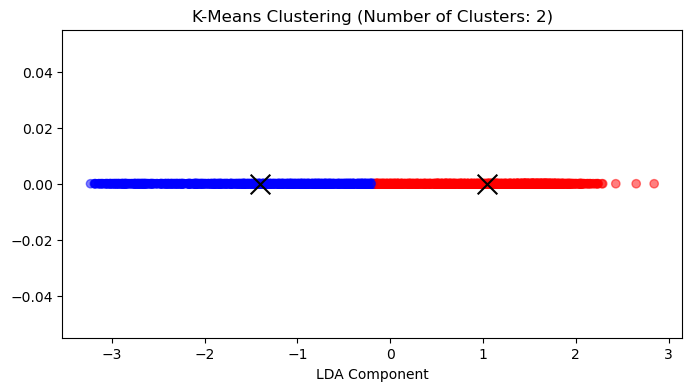

C:\Users\sertacbattal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


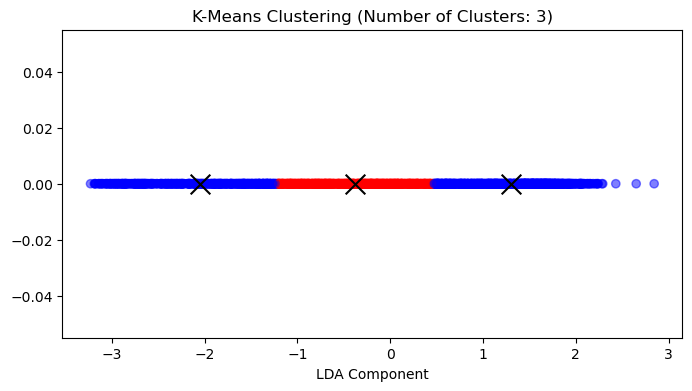

C:\Users\sertacbattal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


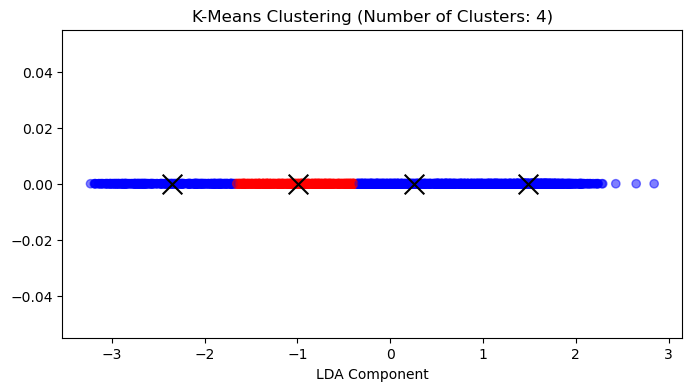

In [29]:
# Evaluating the K-Means model for different cluster numbers (2,3,4)

for n_clusters in range(2, 5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Train the model and perform clustering
    kmeans.fit(X_lda_transformed)
    
    # Assigning each data point to a cluster
    cluster_labels = kmeans.labels_
    
    # Getting the cluster centers
    cluster_centers = kmeans.cluster_centers_
    
    # Determine the colors according to the number of clusters (optional)
    colors = ['red' if label == 0 else 'blue' for label in cluster_labels]

    # Visualization of clusters
    plt.figure(figsize=(8, 4))
    plt.scatter(X_lda_transformed[:, 0], [0] * len(X_lda_transformed), c=colors, alpha=0.5)
    plt.scatter(cluster_centers[:, 0], [0] * len(cluster_centers), c='black', marker='x', s=200)
    plt.title(f'K-Means Clustering (Number of Clusters: {n_clusters})')
    plt.xlabel('LDA Component')
    plt.show()


## Train and Test the Machine Learning Models

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


Split 1 Accuracy: 0.9714912280701754
Split 1 Cross-Validation Scores: [0.97149123 0.96052632 0.97587719 0.96923077 0.97582418]
Split 1 Mean Cross-Validation Score: 0.9705899363794102


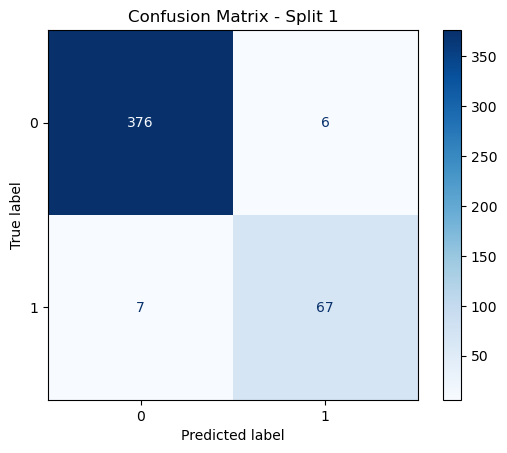

Split 1 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       382
           1       0.92      0.91      0.91        74

    accuracy                           0.97       456
   macro avg       0.95      0.94      0.95       456
weighted avg       0.97      0.97      0.97       456

Split 2 Accuracy: 0.9722222222222222
Split 2 Cross-Validation Scores: [0.97149123 0.96052632 0.97587719 0.96923077 0.97582418]
Split 2 Mean Cross-Validation Score: 0.9705899363794102


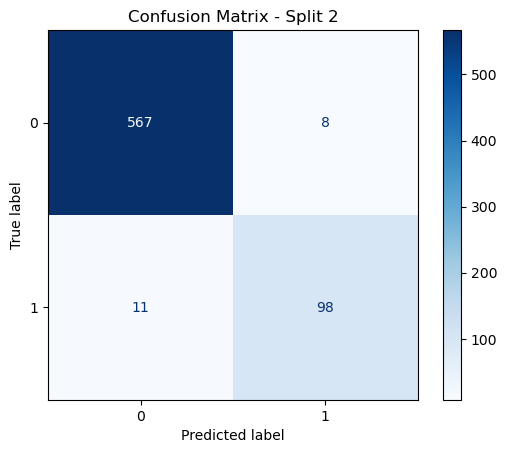

Split 2 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       575
           1       0.92      0.90      0.91       109

    accuracy                           0.97       684
   macro avg       0.95      0.94      0.95       684
weighted avg       0.97      0.97      0.97       684

Split 3 Accuracy: 0.9736842105263158
Split 3 Cross-Validation Scores: [0.97149123 0.96052632 0.97587719 0.96923077 0.97582418]
Split 3 Mean Cross-Validation Score: 0.9705899363794102


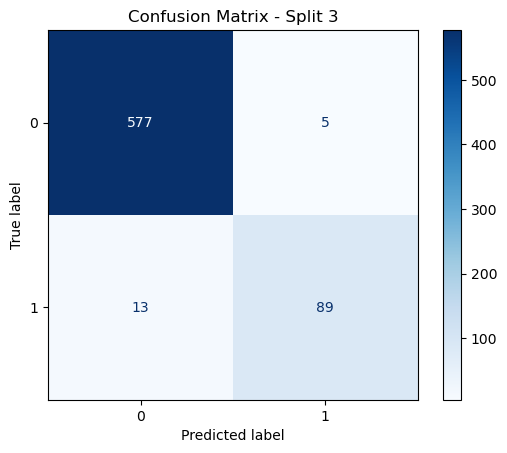

Split 3 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       582
           1       0.95      0.87      0.91       102

    accuracy                           0.97       684
   macro avg       0.96      0.93      0.95       684
weighted avg       0.97      0.97      0.97       684



In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Our features: X_lda_transformed and our target value is y_lda

# Split the data into two different splits
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_lda_transformed, y_lda, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_lda_transformed, y_lda, test_size=0.3, random_state=54)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_lda_transformed, y_lda, test_size=0.3, random_state=99)

# List to store results
results = []

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through different splits
for i, (X_train, X_test, y_train, y_test) in enumerate([(X_train1, X_test1, y_train1, y_test1),
                                                         (X_train2, X_test2, y_train2, y_test2),
                                                         (X_train3, X_test3, y_train3, y_test3)], start=1):
    
    # Random Forest for Classification
    # Fitting the final model with the best parameters obtained from grid search
    rf_classifier = RandomForestClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50)
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Split {i} Accuracy: {accuracy}")

    # Cross-validation
    cv_scores = cross_val_score(rf_classifier, X_lda_transformed, y_lda, cv=kf, scoring='accuracy')
    print(f"Split {i} Cross-Validation Scores:", cv_scores)
    print(f"Split {i} Mean Cross-Validation Score:", np.mean(cv_scores))
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_lda))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - Split {i}")
    plt.show()

    # Classification Report
    class_report = classification_report(y_test, y_pred)
    print(f"Split {i} Classification Report:")
    print(class_report)

    # Store results
    results.append({
        'split': i,
        'accuracy': accuracy,
        'cv_mean_score': np.mean(cv_scores),
        'conf_matrix': conf_matrix,
        'class_report': class_report
    })




## Comparison of ML Modelling Outcomes

In [33]:
import pandas as pd

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)


   split  accuracy  cv_mean_score           conf_matrix  \
0      1  0.971491        0.97059   [[376, 6], [7, 67]]   
1      2  0.972222        0.97059  [[567, 8], [11, 98]]   
2      3  0.973684        0.97059  [[577, 5], [13, 89]]   

                                        class_report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  


In [34]:
results_df

split  accuracy  cv_mean_score           conf_matrix  \
0      1  0.971491        0.97059   [[376, 6], [7, 67]]   
1      2  0.972222        0.97059  [[567, 8], [11, 98]]   
2      3  0.973684        0.97059  [[577, 5], [13, 89]]   

                                        class_report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...

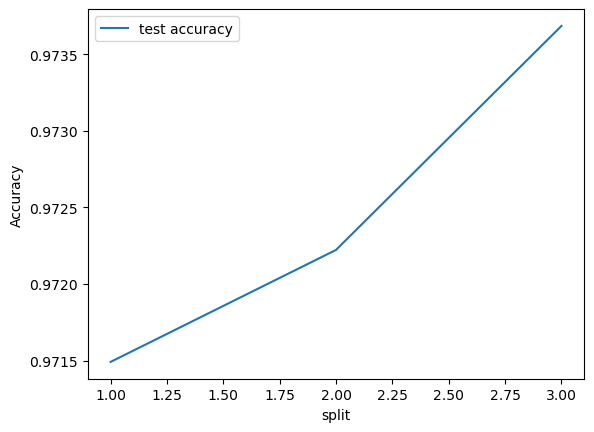

In [35]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(results_df.split, 
         results_df.accuracy, 
         label="test accuracy")
plt.xlabel("split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

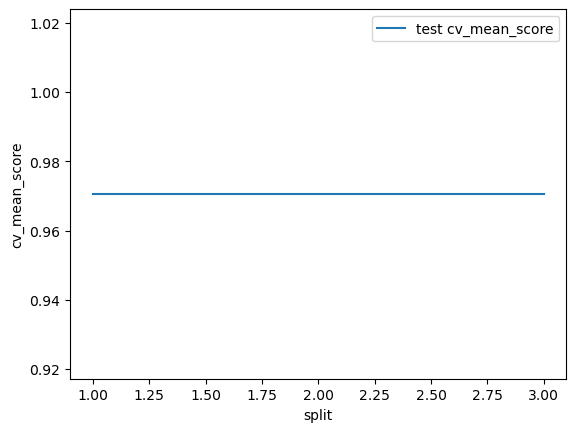

In [36]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(results_df.split, 
         results_df.cv_mean_score, 
         label="test cv_mean_score")
plt.xlabel("split")
plt.ylabel("cv_mean_score")
plt.legend()
plt.show()

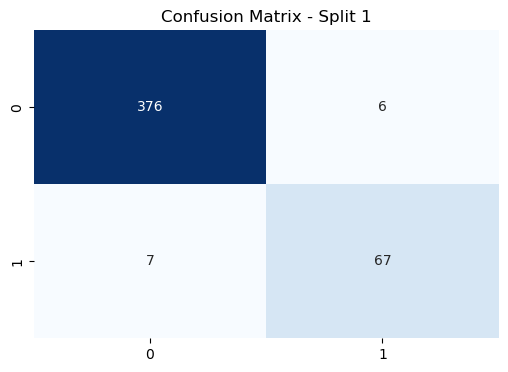

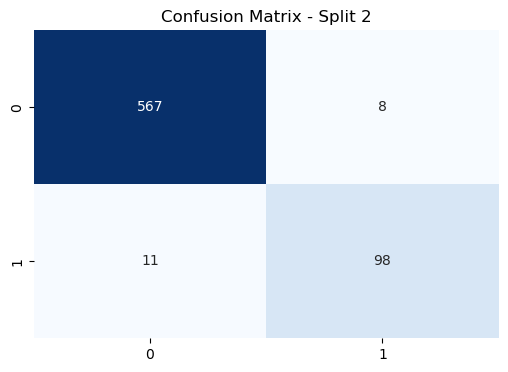

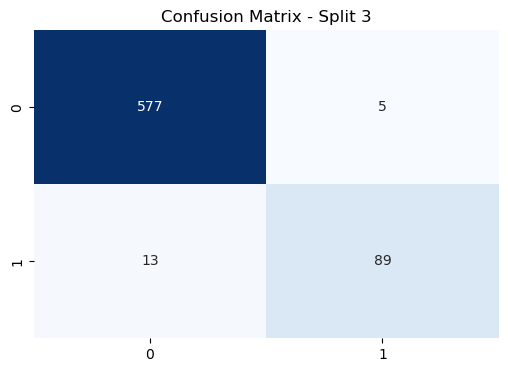

In [37]:
# Confusion Matrix görselleştirmesi
for i, conf_matrix in enumerate(results_df['conf_matrix']):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - Split {i+1}')
    plt.show()

In [38]:
for result in results:
    print(f"Classification Report:\n{result['class_report']}")
    print("--------------------------------------------------")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       382
           1       0.92      0.91      0.91        74

    accuracy                           0.97       456
   macro avg       0.95      0.94      0.95       456
weighted avg       0.97      0.97      0.97       456

--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       575
           1       0.92      0.90      0.91       109

    accuracy                           0.97       684
   macro avg       0.95      0.94      0.95       684
weighted avg       0.97      0.97      0.97       684

--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       582
           1       0.95      0.87      0.91       102

    accurac

**Analysis and Discussion:**

Note: With the encoder we have already made, we know that the class 0 is Adult and class 1 is Senior.

In the case of the first split (split: 0.20), it was observed that the model recognized both class 0 and class 1 with high accuracy. This shows that the model has a generally balanced performance. While the high precision, recall and F1-score values for class 0 indicate that this class is classified correctly, the somewhat low precision and recall values for class 1 are noteworthy. This may reflect class 1 being more difficult to classify by the model or an imbalance within the class.

In the case of the second split (split:0.25), high accuracy, precision, recall and F1-score values ​​continue for class 0. However, a slight decrease in precision and recall values is observed for class 1. This may indicate that the second split deals with class 1 in a slightly more challenging manner.

In the case of the third split (split: 0.30), while the high performance continues for class 0, there is a significant decrease in the recall value for class 1. This indicates that the third split recognizes class 1 with lower accuracy and misses some instances of this class.

In general, although similar accuracy and classification performance were seen between divisions, classification of class 1 showed differences, especially in recall values. This indicates that the model recognizes class 1 better or worse in certain cases, and this may be due to the characteristics of the dataset. In future studies, it is important to understand this situation better and make improvements so that the model can better classify class 1.

<hr>

**Project Report: NHANES Dataset Analysis and Age Estimation**

Data Set and Problem Description This project aims to estimate age using the NHANES data set, which examines the health and nutritional status of adults living in the United States. The dataset includes results from NHANES, a CDC-funded health and nutrition assessment study. The main purpose of the data set is to indicate those aged 65 and over as "Senior" and those under the age of 65 as "Adult".

**Data Preparation Steps**

**2.1. Data Discovery**

The analysis was started using the "NHANES_age_prediction.csv" data set. First, basic statistics were examined and visualizations were made to understand the general features of the data set. Missing data was checked and as can be seen, there is no missing data in the data set, which shows us the reliability of the results of the data set, because the steps we would apply for missing data would lead to the corruption of the data set.

**2.2. Feature Engineering**

New features were derived by identifying the basic features in the data set and using them. Categorical variables were digitized using label encoding. Additionally, the data was made ready for modeling by performing standardization and scaling processes. Before using these techniques, data were visualized and graphs were used to determine which technique to apply.

**2.3. Size Reduction**

Using PCA and LDA methods, the size of the data set was reduced and the separation between classes was evaluated. If we look at the working principles of the PCA and LDA methods used, it is clear that LDA is more suitable for the data set given to us because, as is known in LDA, we have a target value that we can use in classification algorithms. Therefore, by comparing these two methods, operations were continued with LDA.

**Machine Learning Models**

In the project, RandomForestClassifier was used to estimate age. The best hyperparameters were determined using GridSearchCV. Training and testing procedures were carried out for two different splits. The results were evaluated and the best model was selected. 3 different split processes were performed and the best scores were visualized and interpreted with graphs/tables. The best parameter for GridSearchCV was found to be {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}.

**Results and Evaluation**

Metrics In the results obtained, an overall high accuracy was achieved. However, there were some difficulties, especially in the "Senior" class. The overall performance of the model is notable for its high accuracy, especially in the "Adult" class.

**Discussion and Conclusions**

The results obtained within the scope of the project show that an effective model has been developed for age estimation. However, classification difficulty was observed in the class containing older individuals. This may require more data or feature engineering strategies to identify older individuals.


# References



analyticsvidhya (2016). Clustering | Types Of Clustering | Clustering Applications. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/#:~:text=Clustering%20is%20the%20task%20of. 

aptech (2023). Fundamentals of Tuning Machine Learning Hyperparameters | Aptech. [online] www.aptech.com. Available at: https://www.aptech.com/blog/fundamentals-of-tuning-machine-learning-hyperparameters/. 

cloud.google (n.d.). What is unsupervised learning? [online] Google Cloud. Available at: https://cloud.google.com/discover/what-is-unsupervised-learning#:~:text=Unsupervised%20learning%20in%20artificial%20intelligence. 

IBM (2023a). What is Random Forest? | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly. 

IBM (2023b). What is Supervised Learning? | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/supervised-learning#:~:text=Supervised%20learning%2C%20also%20known%20as. 
Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/. 

sabrepc (n.d.). Classification vs Clustering Algorithms | SabrePC. [online] www.sabrepc.com. Available at: https://www.sabrepc.com/blog/Deep-Learning-and-AI/classification-vs-clustering [Accessed 2 Jan. 2024].

Scikit-learn (2018). sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
scikit-learn (2010). 2.3. Clustering — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/clustering.html.

scikit-learn (2019). sklearn.model_selection.GridSearchCV — scikit-learn 0.22 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

Vungarala, S.K. (2023). PCA vs LDA — No more confusion! [online] Medium. Available at: https://medium.com/@seshu8hachi/pca-vs-lda-no-more-confusion-fc21fb8d06e9.
